In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [3]:
california_housing_dataset = fetch_california_housing(as_frame=True)

In [4]:
california_housing_df = california_housing_dataset["frame"]

In [5]:
california_housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
breast_cancer_dataset = load_breast_cancer()

In [7]:
breast_cancer_df = pd.DataFrame(
    breast_cancer_dataset["data"],
    columns=breast_cancer_dataset["feature_names"],
)

In [8]:
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: >

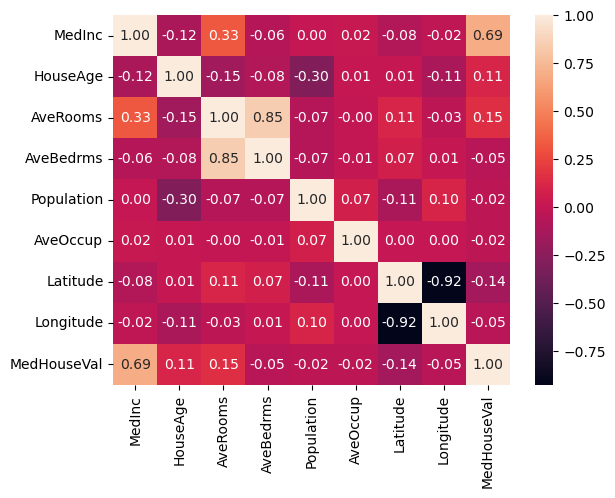

In [9]:
sns.heatmap(california_housing_df.corr(numeric_only=True), annot=True, fmt=".2f")

In [10]:
X, y = california_housing_df[["MedInc"]], california_housing_df["MedHouseVal"]

In [11]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
train_X.head()

,MedInc
14196,3.2596
8267,3.8125
17445,4.1563
14265,1.9425
2271,3.5542


In [13]:
test_X.head()

,MedInc
20046,1.6812
3024,2.5313
15663,3.4801
20484,5.7376
9814,3.7250


In [14]:
regressor = LinearRegression()

In [15]:
regressor.fit(train_X, train_y)

LinearRegression()

In [16]:
print(f"Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")
pred_y = regressor.predict(test_X)

Coefficients: [0.41933849]
Intercept: 0.4445972916907883


In [17]:
pred_y = regressor.predict(test_X)

In [18]:
X, y = california_housing_df.drop(columns=["MedHouseVal"]), california_housing_df["MedHouseVal"]

In [19]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
regressor = LinearRegression()

In [21]:
regressor.fit(train_X, train_y)

LinearRegression()

In [22]:
X, y = california_housing_df.drop(columns=["MedHouseVal"]), california_housing_df["MedHouseVal"]

In [23]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
polynomial_features = PolynomialFeatures(degree=2)

In [25]:
train_X = polynomial_features.fit_transform(train_X)

In [26]:
test_X = polynomial_features.transform(test_X)

In [27]:
X, y = california_housing_df.drop(columns=["MedHouseVal"]), california_housing_df["MedHouseVal"]

In [28]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
regressor = Lasso(alpha=1.0).fit(train_X, train_y)

In [31]:
regressor = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5).fit(train_X, train_y)